# Plot results

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import visualize as vis
from util import load_params, npload
from plot import plot_time_series

data_dir = "data/case4/r0-t3"

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharex=True)
plot_time_series(
    data_dir=data_dir,
    target_m_list=[14],
    target_alpha_list=None,
    plot_type="mean",
    plot_metric="SE",
    plot_ylabel=True,
    plot_legend=True,
    ax=ax,
    title="Expectation of SE",
    plot_per=5000,
)
fig.tight_layout()
fig.savefig("figures/fig7-1.pdf", transparent=True)
plt.close(fig)

<Axes: >

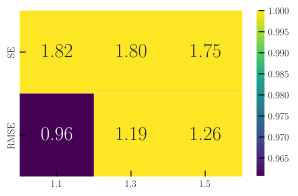

In [ ]:
sup_se = pd.read_csv(f"{data_dir}/sup_se.csv", index_col=0, header=0)
sup_rmse = pd.read_csv(f"{data_dir}/sup_rmse.csv", index_col=0, header=0)
metric = pd.concat([np.sqrt(sup_se/ 40), sup_rmse])
metric.index = ["SE", "RMSE"]
import seaborn as sns
sns.heatmap(metric, annot=True, fmt=".2f", vmax=1.0, cmap="viridis")

(0.1, 150)

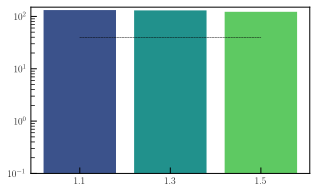

In [ ]:
colors = vis.get_color_palette(3, "viridis")
plt.bar(sup_se.columns, sup_se.values[0], color=colors)
plt.plot(sup_se.columns, 40*np.ones_like(sup_se.columns), color="black", ls="dashed")
plt.yscale("log")
plt.ylim([0.1, 150])